### Example 1.9 Moving Averages and Filtering

Considering a white noise $w_t$, in this example we replace this noise with an average of its current value and its immediate neighbors in the past and future, that is
$$ v_t=\frac{1}{3}(w_{t-1} + w_t + w_{t+1})$$
A linear combination of values in a time series is referred generically, to as a filtered series, hence we use the command "filter"

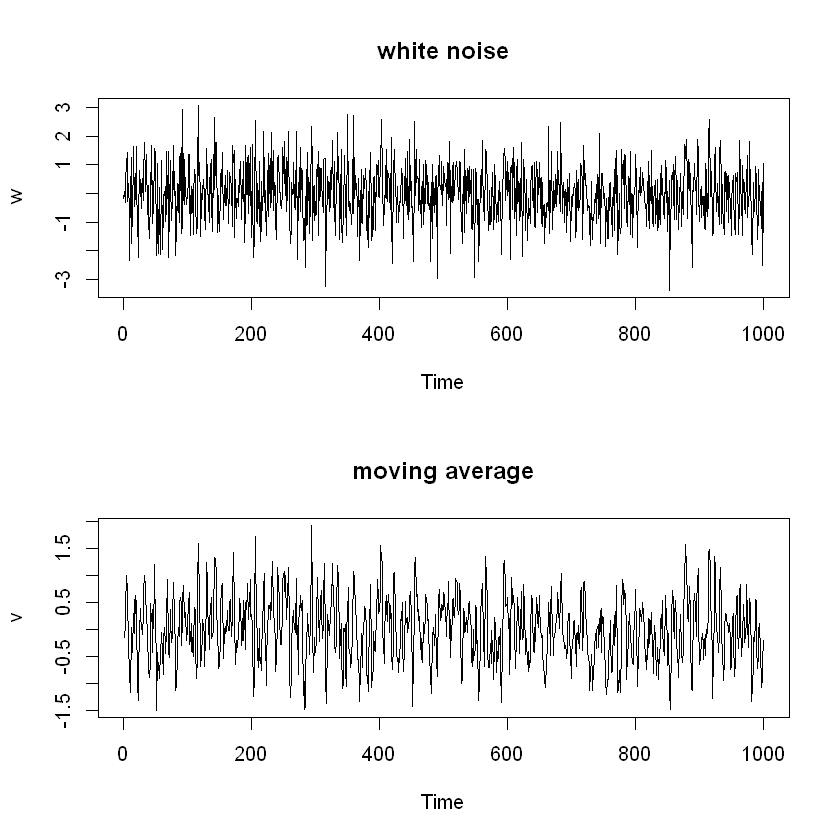

In [21]:
w=rnorm(1000)
v=filter(w,sides=2,filter=rep(1/3,3))
par(mfrow=c(2,1))
plot.ts(w, main='white noise')
plot.ts(v, main='moving average')

Let's compute the autocovariance of the moving average process. The autocovariance function is defined as the second moment product

\begin{equation}
 \gamma (s,t) = cov(x_s,x_t) = E[(x_s-\mu_s)(x_t-\mu_t)]
\end{equation}

In this case
$$\gamma(s,t)=cov \left[ \frac{1}{3}(w_{s-1} + w_s + w_{s+1}), \frac{1}{3}(w_{t-1} + w_t + w_{t+1})  \right]$$

In [18]:
shift<-function(x,shift_by){
  stopifnot(is.numeric(shift_by))
  stopifnot(is.numeric(x))
  
  if (length(shift_by)>1)
    return(sapply(shift_by,shift, x=x))
  
  out<-NULL
  abs_shift_by=abs(shift_by)
  if (shift_by > 0 )
    out<-c(tail(x,-abs_shift_by),rep(NA,abs_shift_by))
  else if (shift_by < 0 )
    out<-c(rep(NA,abs_shift_by), head(x,-abs_shift_by))
  else
    out<-x
  out
}

In [32]:
v = v[3:length(v)-1]
var(w)
cov(v,v)
3*var(w)/9

[1] 1.019229

[1] 0.3427452

[1] 0.3397429

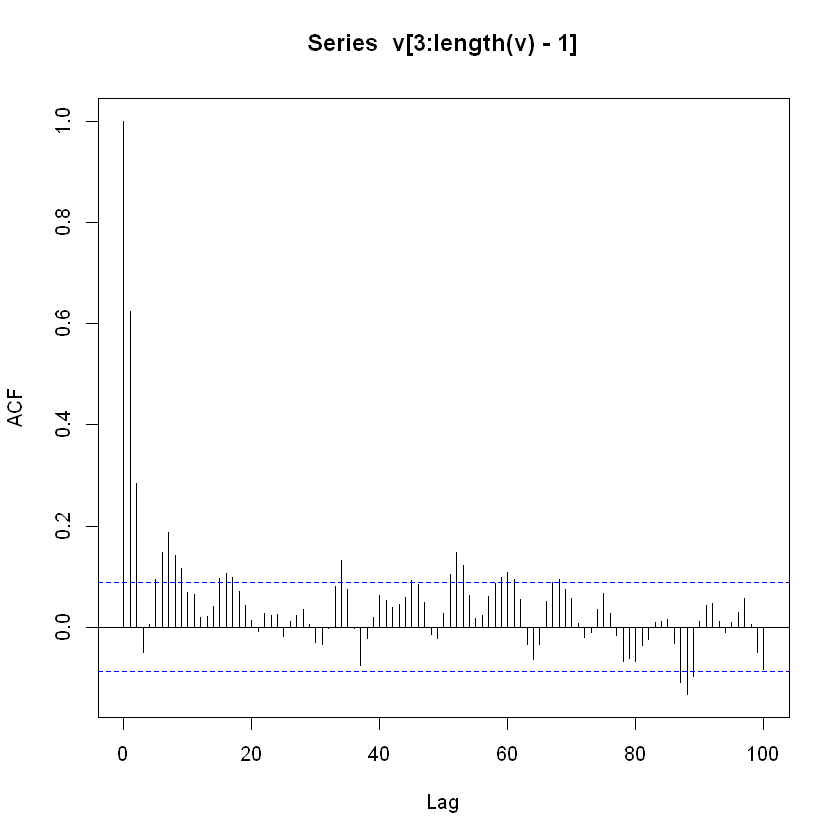

In [17]:
acf(v[3:length(v)-1],lag.max=100)

### Example 1.10 Autoregression

Suppose we consider the white noise of the previous example as input and calculate the output using the second-order equation
$$x_t=x_{t-1} -.9 x_{t-2}+w_t $$
This equation represents a regression or prediction of the current value of $x_t$ of a time series as a function of the past two values of the series and, hence, the term 'autoregression' is used for this model

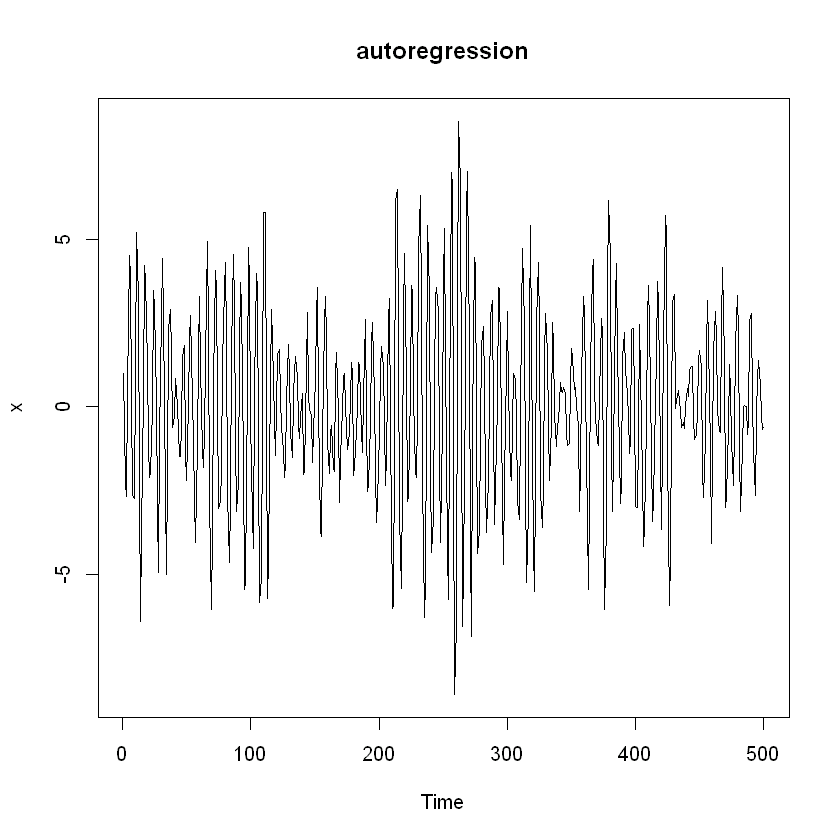

In [6]:
w=rnorm(550,0,1)
x= filter(w, filter=c(1,-.9),method="recursive")[-(1:50)]
plot.ts(x, main="autoregression")

### Example 1.11 Random walk with drift

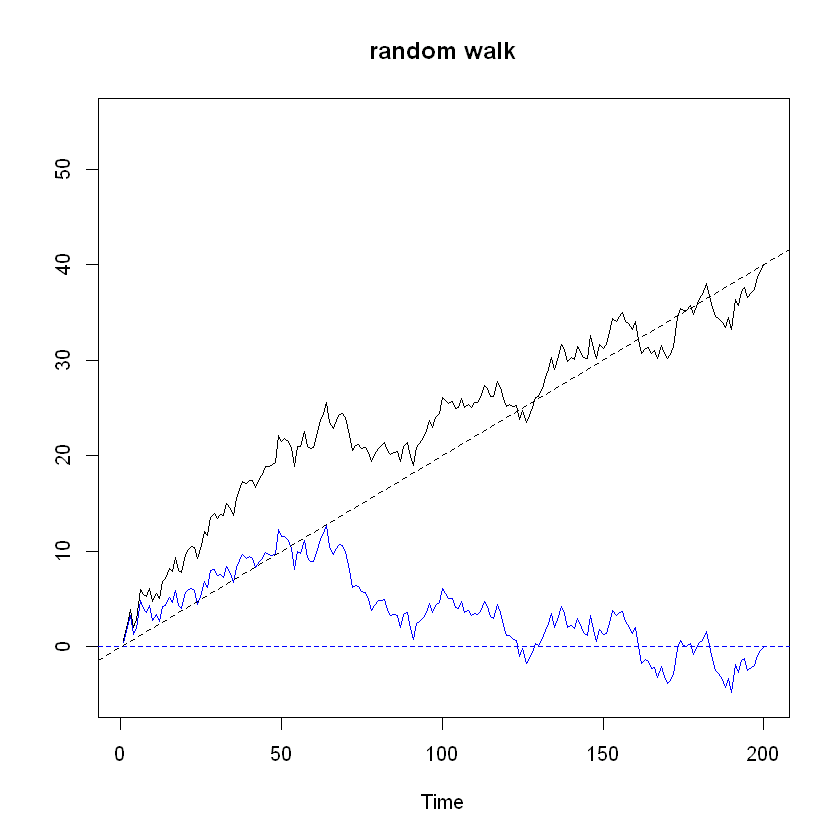

In [2]:
w=rnorm(200,0,1)
x=cumsum(w)
wd=w+.2
xd=cumsum(wd)
plot.ts(xd,ylim=c(-5,55),main="random walk",ylab='')
lines(x,col=4)
abline(h=0,col=4,lty=2)
abline(a=0,b=.2,lty=2)